In [1]:
#import library and read input data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colorbar import ColorbarBase

from pandas import set_option
set_option("display.max_rows", 10)
filename = 'facies_vectors.csv'
training_data = pd.read_csv(filename)

In [2]:
training_data.describe()

Facies        Depth           GR    ILD_log10     DeltaPHI  \
count  4149.000000  4149.000000  4149.000000  4149.000000  4149.000000   
mean      4.503254  2906.867438    64.933985     0.659566     4.402484   
std       2.474324   133.300164    30.302530     0.252703     5.274947   
min       1.000000  2573.500000    10.149000    -0.025949   -21.832000   
25%       2.000000  2821.500000    44.730000     0.498000     1.600000   
50%       4.000000  2932.500000    64.990000     0.639000     4.300000   
75%       6.000000  3007.000000    79.438000     0.822000     7.500000   
max       9.000000  3138.000000   361.150000     1.800000    19.312000   

             PHIND           PE         NM_M       RELPOS  
count  4149.000000  3232.000000  4149.000000  4149.000000  
mean     13.201066     3.725014     1.518438     0.521852  
std       7.132846     0.896152     0.499720     0.286644  
min       0.550000     0.200000     1.000000     0.000000  
25%       8.500000     3.100000     1.000000     0.277000  
50%      12.020000     3.551500     2.000000     0.528000  
75%      16.050000     4.300000     2.000000     0.769000  
max      84.400000     8.094000     2.000000     1.000000

In [3]:
training_data.head()

Facies Formation  Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664       9.9  11.915   
1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661      14.2  12.565   
2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658      14.8  13.050   
3       3     A1 SH  SHRIMPLIN  2794.5  86.10      0.655      13.9  13.115   
4       3     A1 SH  SHRIMPLIN  2795.0  74.58      0.647      13.5  13.300   

    PE  NM_M  RELPOS  
0  4.6     1   1.000  
1  4.1     1   0.979  
2  3.6     1   0.957  
3  3.5     1   0.936  
4  3.4     1   0.915

In [4]:
training_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

# Keep well Church man bible as blind well for test

In [5]:
training_data["Well Name"].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [6]:
blind = training_data[training_data['Well Name'] == 'CHURCHMAN BIBLE']
training_data = training_data[training_data['Well Name'] != 'CHURCHMAN BIBLE']

# clean up data and change Well Name and formation as categorial data

training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')
training_data['Well Name'].unique()

['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY']
Categories (9, object): ['ALEXANDER D', 'CROSS H CATTLE', 'KIMZEY A', 'LUKE G U', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

In [7]:
blind['Well Name'] = blind['Well Name'].astype('category')
blind.head()

Facies Formation        Well Name   Depth      GR  ILD_log10  DeltaPHI  \
3745       3     A1 SH  CHURCHMAN BIBLE  2917.5  63.500      0.705     4.916   
3746       3     A1 SH  CHURCHMAN BIBLE  2918.0  80.875      0.709     7.514   
3747       3     A1 SH  CHURCHMAN BIBLE  2918.5  87.813      0.700     7.785   
3748       3     A1 SH  CHURCHMAN BIBLE  2919.0  86.750      0.685     7.547   
3749       3     A1 SH  CHURCHMAN BIBLE  2919.5  79.438      0.669     5.912   

       PHIND     PE  NM_M  RELPOS  
3745  12.174  3.162     1    1.00  
3746  13.286  2.932     1    0.95  
3747  13.212  2.953     1    0.90  
3748  13.547  3.420     1    0.85  
3749  12.252  3.324     1    0.80

# QC 

## Pair plot 

In [8]:
training_data.isna().sum()

Facies         0
Formation      0
Well Name      0
Depth          0
GR             0
            ... 
DeltaPHI       0
PHIND          0
PE           917
NM_M           0
RELPOS         0
Length: 11, dtype: int64

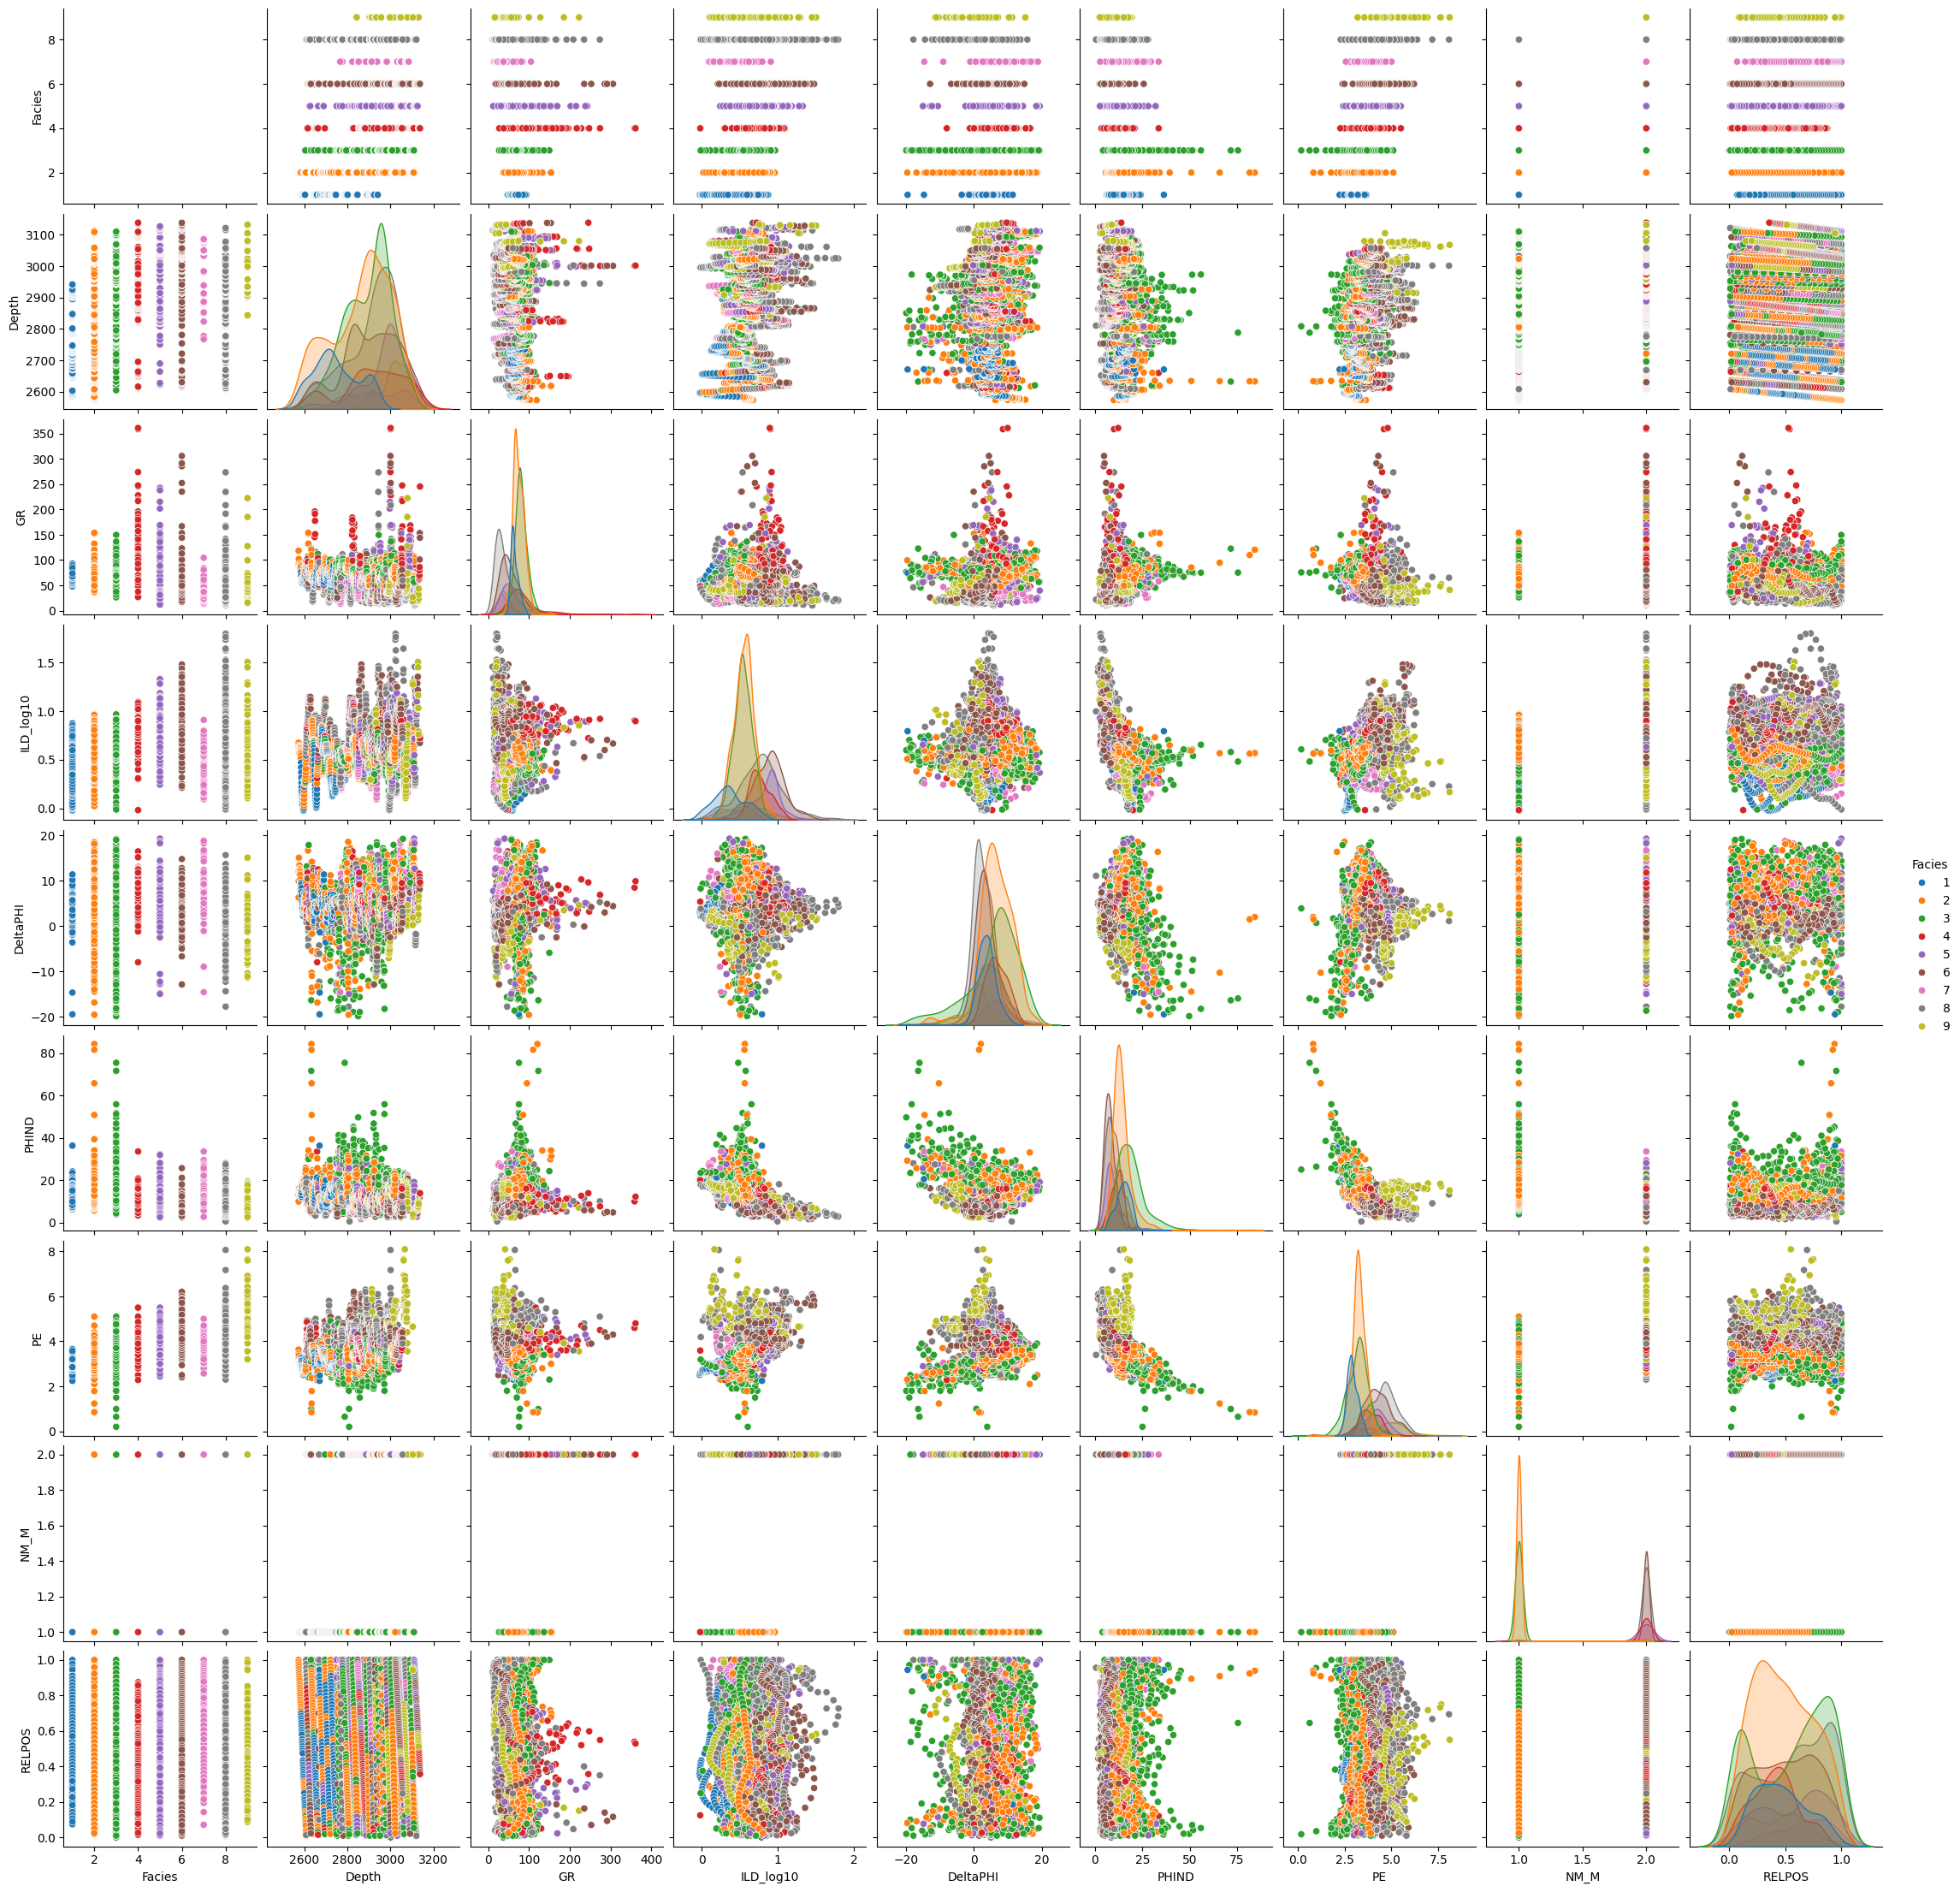

In [9]:
# Select only numeric columns for the pair plot
numeric_cols = training_data.select_dtypes(include=[np.number]).columns

# Color by facies (replace 'Facies' with your actual facies column name if different)
sns.pairplot(training_data, vars=numeric_cols, hue="Facies", palette="tab10", diag_kind="kde")
plt.show()

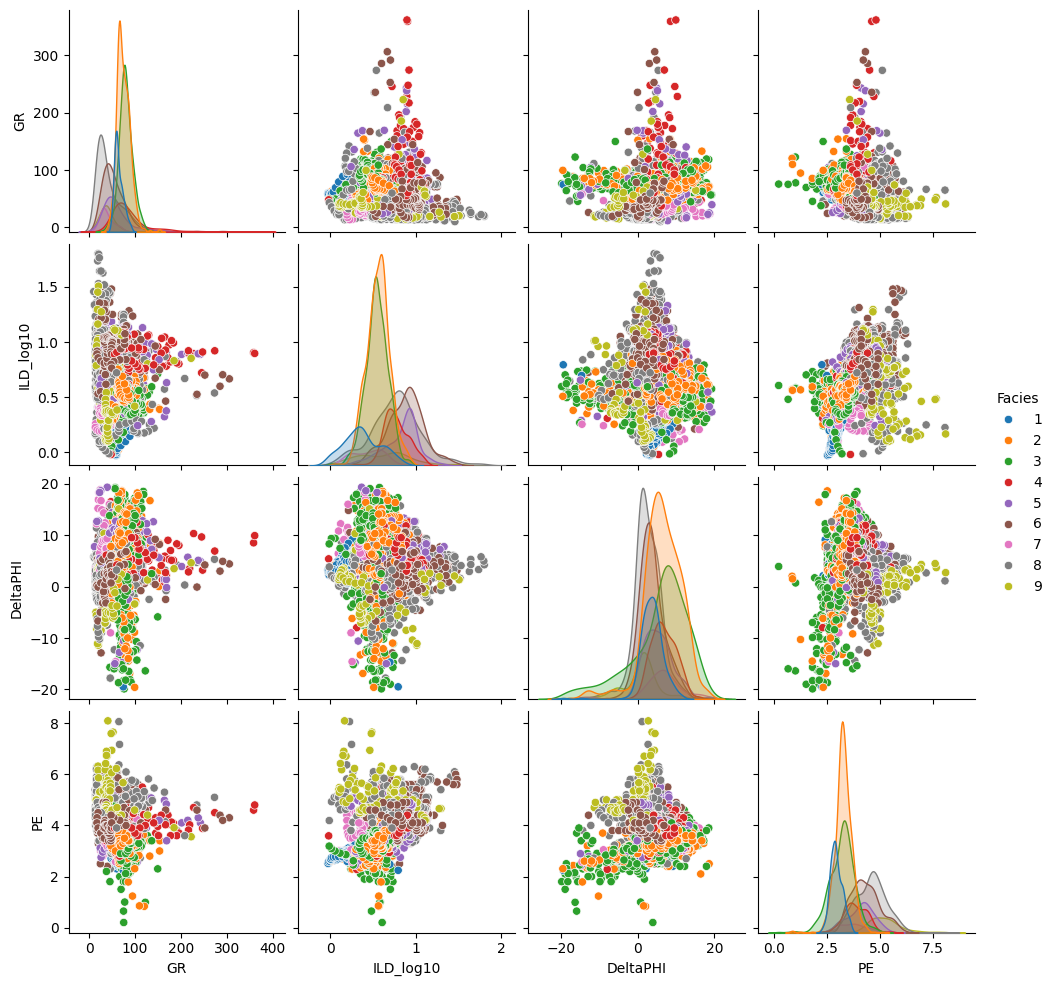

In [10]:
col_for_pairplot = ["GR", "ILD_log10", "DeltaPHI", "PE"]
sns.pairplot(training_data, vars=col_for_pairplot, hue="Facies", palette="tab10", diag_kind="kde")
plt.show()

## Boxplot and Half violin plot

/tmp/ipykernel_23587/125392714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_23587/125392714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_23587/125392714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_23587/125392714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


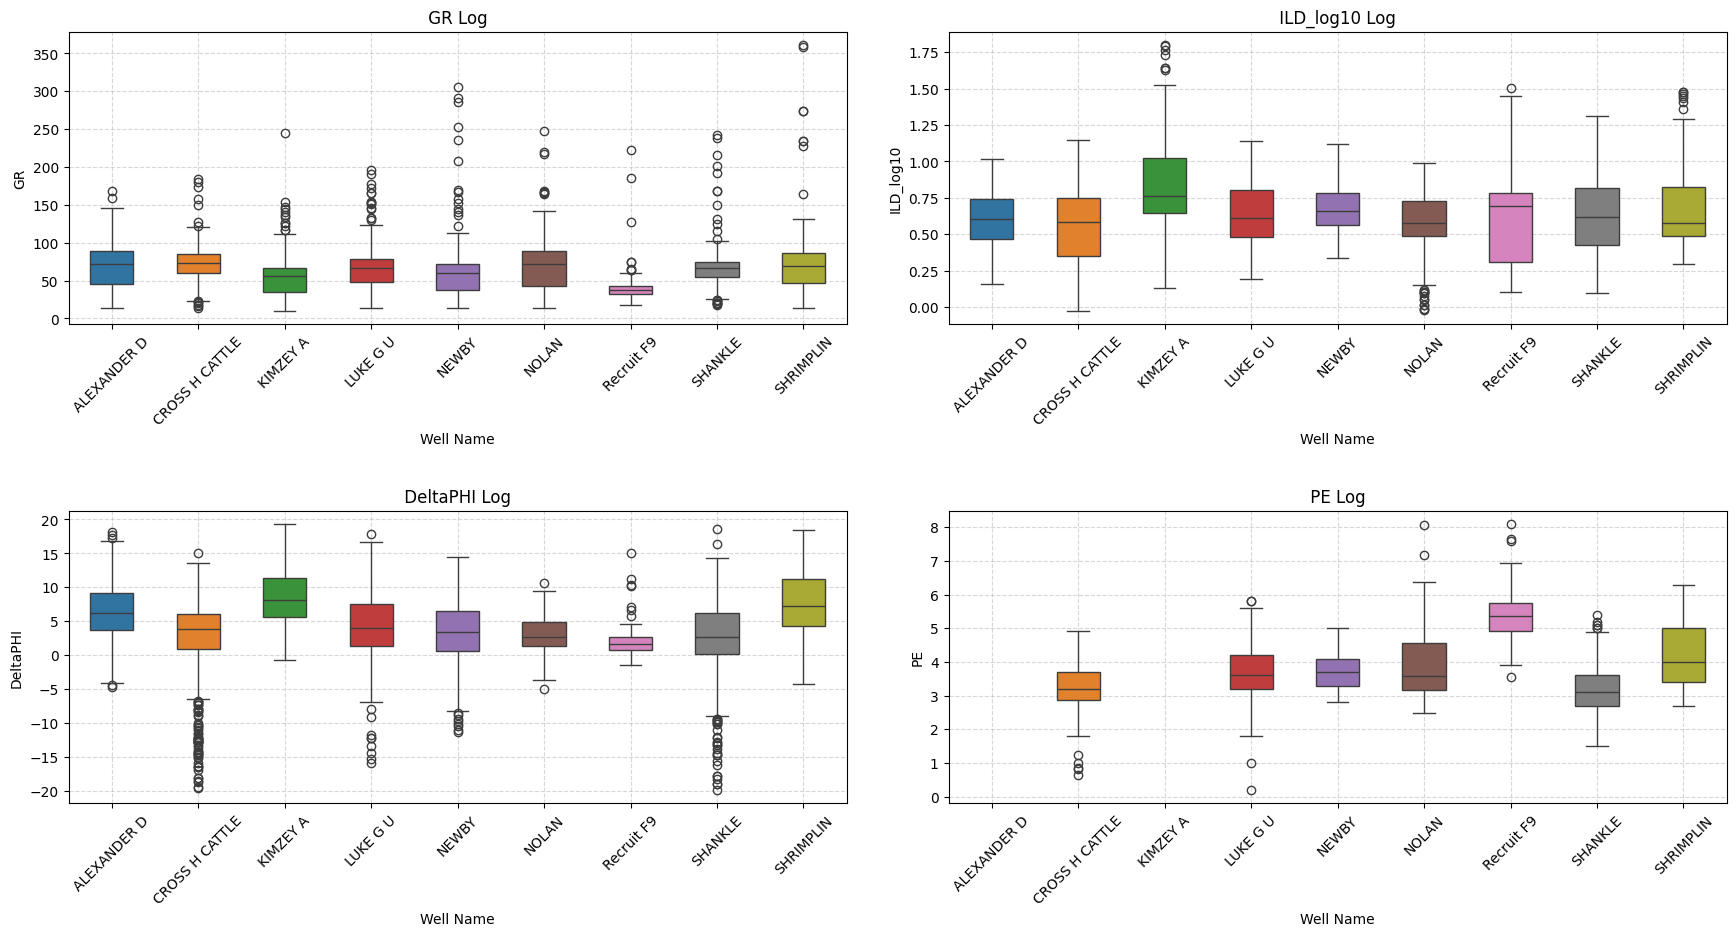

In [11]:
cols = ["GR", "ILD_log10", "DeltaPHI", "PE"]
wells = training_data["Well Name"].unique()
plt.figure(figsize=(18, 10))  # Wider for more wells
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        data=training_data,
        x="Well Name",
        y=col,
        palette="tab10",
        width=0.5  # Make boxes thinner for more gap
    )
    plt.title(f" {col} Log ")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(pad=3.0)

plt.show()

/tmp/ipykernel_23587/688988463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_23587/688988463.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/tmp/ipykernel_23587/688988463.py:9: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(
/tmp/ipykernel_23587/688988463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_23587/688988463.py:9: FutureWarning: 


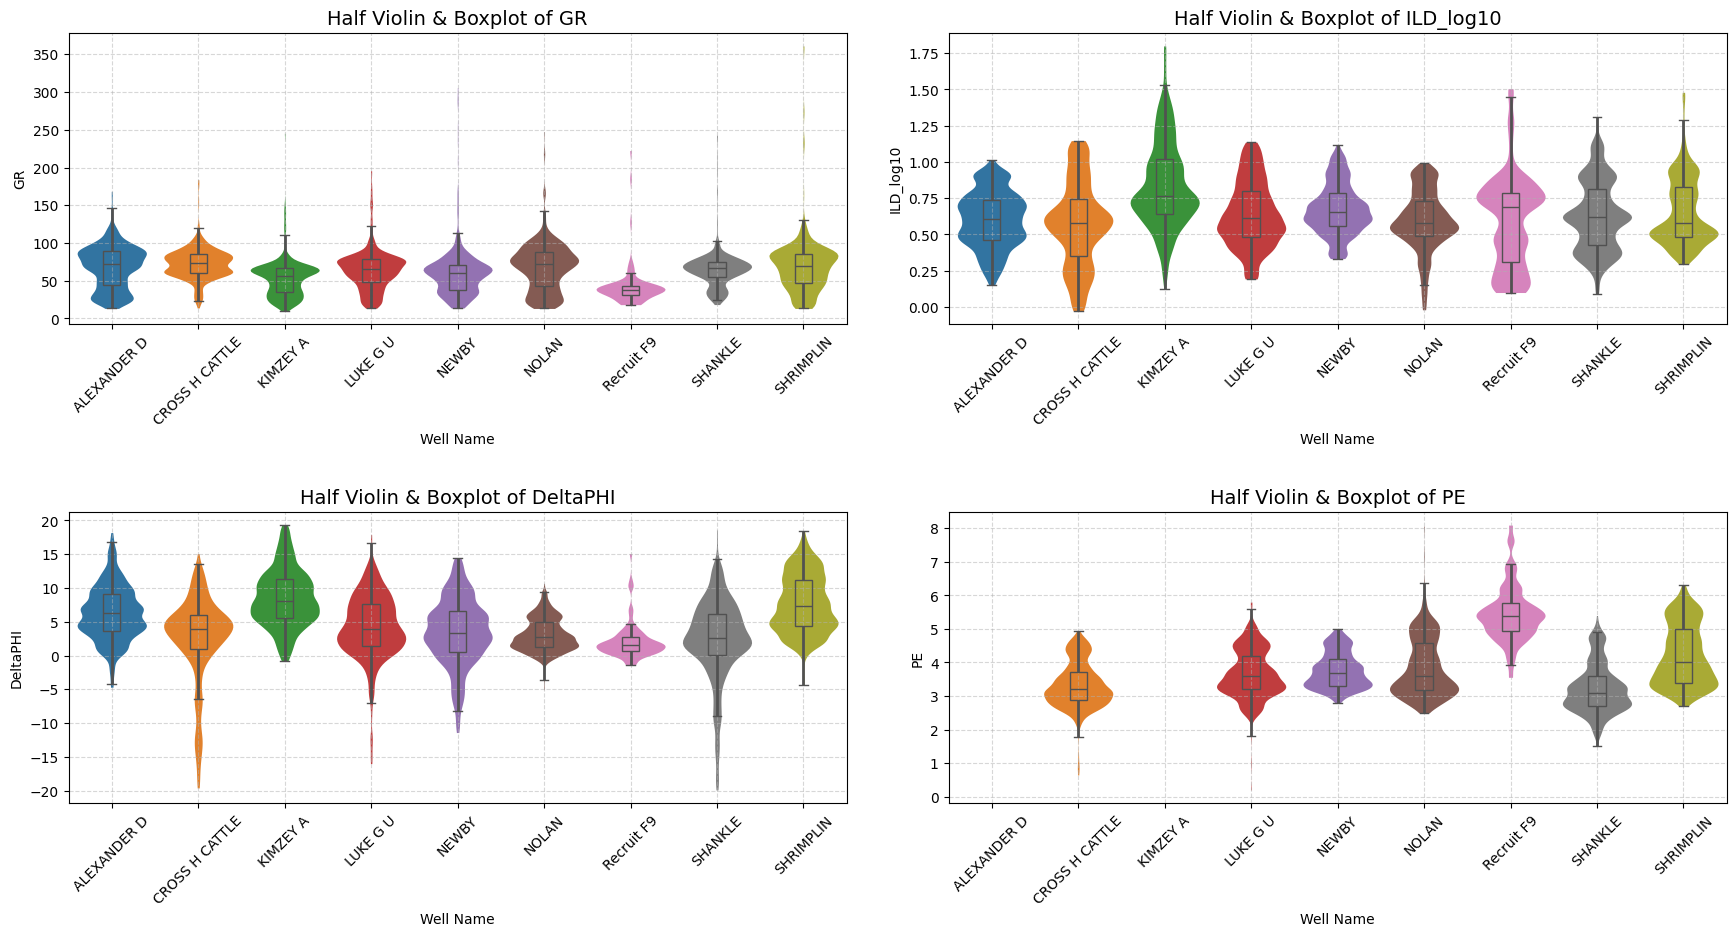

In [12]:
cols_for_violin = ["GR", "ILD_log10", "DeltaPHI", "PE"]

plt.figure(figsize=(18, 10))

for i, col in enumerate(cols_for_violin, 1):
    plt.subplot(2, 2, i)

    # Draw half violin plot (left side only)
    sns.violinplot(
        data=training_data,
        x="Well Name",
        y=col,
        palette="tab10",
        cut=0,
        inner=None,
        linewidth=0,
        bw=0.2,
        scale="width"
    )

    # Overlay boxplot
    sns.boxplot(
        data=training_data,
        x="Well Name",
        y=col,
        width=0.2,
        showcaps=True,
        boxprops={'facecolor': 'none', "zorder": 10},
        showfliers=False,
        whiskerprops={'linewidth': 2},
        zorder=10
    )

    plt.title(f"Half Violin & Boxplot of {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(pad=3.0)
plt.show()


/tmp/ipykernel_23587/3958648257.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  v = sns.violinplot(
/tmp/ipykernel_23587/3958648257.py:14: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  v = sns.violinplot(
/tmp/ipykernel_23587/3958648257.py:14: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  v = sns.violinplot(
/tmp/ipykernel_23587/3958648257.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  v = sns.violinplot(
/tmp/ipykernel_23587/39586482

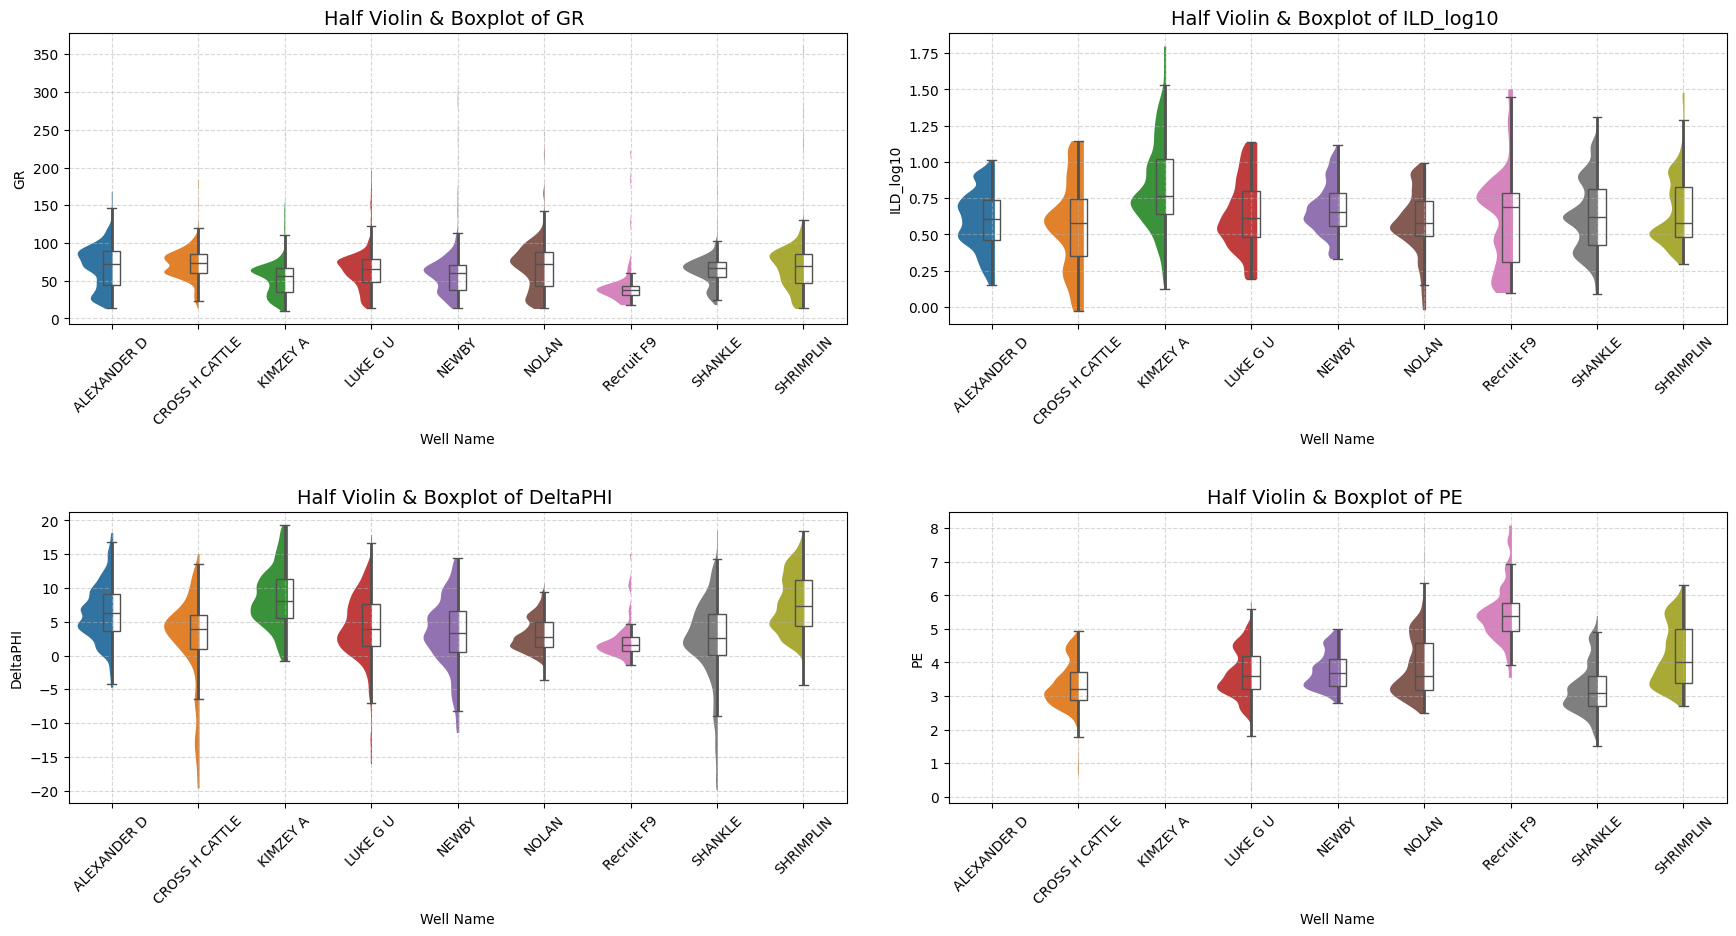

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.collections import PolyCollection

cols_for_violin = ["GR", "ILD_log10", "DeltaPHI", "PE"]

plt.figure(figsize=(18, 10))

for i, col in enumerate(cols_for_violin, 1):
    ax = plt.subplot(2, 2, i)

    # Draw violin
    v = sns.violinplot(
        data=training_data,
        x="Well Name",
        y=col,
        palette="tab10",
        cut=0,
        inner=None,
        linewidth=0,
        bw=0.2,
        scale="width",
        ax=ax
    )

    # Clip violin to left half only
    for art in ax.collections:
        if isinstance(art, PolyCollection):
            verts = art.get_paths()[0].vertices
            verts[:, 0] = np.minimum(verts[:, 0], np.median(verts[:, 0]))

    # Overlay boxplot
    sns.boxplot(
        data=training_data,
        x="Well Name",
        y=col,
        width=0.2,
        showcaps=True,
        boxprops={'facecolor': 'none', "zorder": 10},
        showfliers=False,
        whiskerprops={'linewidth': 2},
        zorder=10,
        ax=ax
    )

    ax.set_title(f"Half Violin & Boxplot of {col} ", fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(pad=3.0)
plt.show()


# Outlier detection 

In [14]:
training_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

In [15]:
well_names = training_data["Well Name"].unique()
print(well_names)

['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY']
Categories (9, object): ['ALEXANDER D', 'CROSS H CATTLE', 'KIMZEY A', 'LUKE G U', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']


In [16]:
cols = ["GR", "ILD_log10", "DeltaPHI", "PE"]
well_ranges_df = training_data.groupby("Well Name")[cols].agg(['min', 'max']).reset_index()
display(well_ranges_df)

/tmp/ipykernel_23587/596277371.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  well_ranges_df = training_data.groupby("Well Name")[cols].agg(['min', 'max']).reset_index()


Well Name      GR          ILD_log10           DeltaPHI          \
                      min      max       min       max      min     max   
0     ALEXANDER D  13.340  168.430  0.155000  1.016000   -4.700  18.200   
1  CROSS H CATTLE  13.893  184.021 -0.025949  1.147027  -19.600  15.100   
2        KIMZEY A  10.149  245.360  0.127000  1.800000   -0.780  19.312   
3        LUKE G U  13.530  195.890  0.194000  1.137000  -16.000  17.900   
4           NEWBY  13.920  305.870  0.334000  1.118000  -11.400  14.400   
5           NOLAN  13.250  247.500 -0.019000  0.992000   -5.054  10.693   
6      Recruit F9  18.297  222.500  0.100000  1.505000   -1.420  15.100   
7         SHANKLE  18.400  242.750  0.093000  1.311000  -19.900  18.600   
8       SHRIMPLIN  13.280  361.150  0.297000  1.480000   -4.300  18.500   

      PE         
     min    max  
0    NaN    NaN  
1  0.646  4.925  
2    NaN    NaN  
3  0.200  5.800  
4  2.800  5.000  
5  2.498  8.063  
6  3.557  8.094  
7  1.500  5.400  
8  2.700  6.300

# Plot for the well Luke G U and Well Shankle


In [19]:
well_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

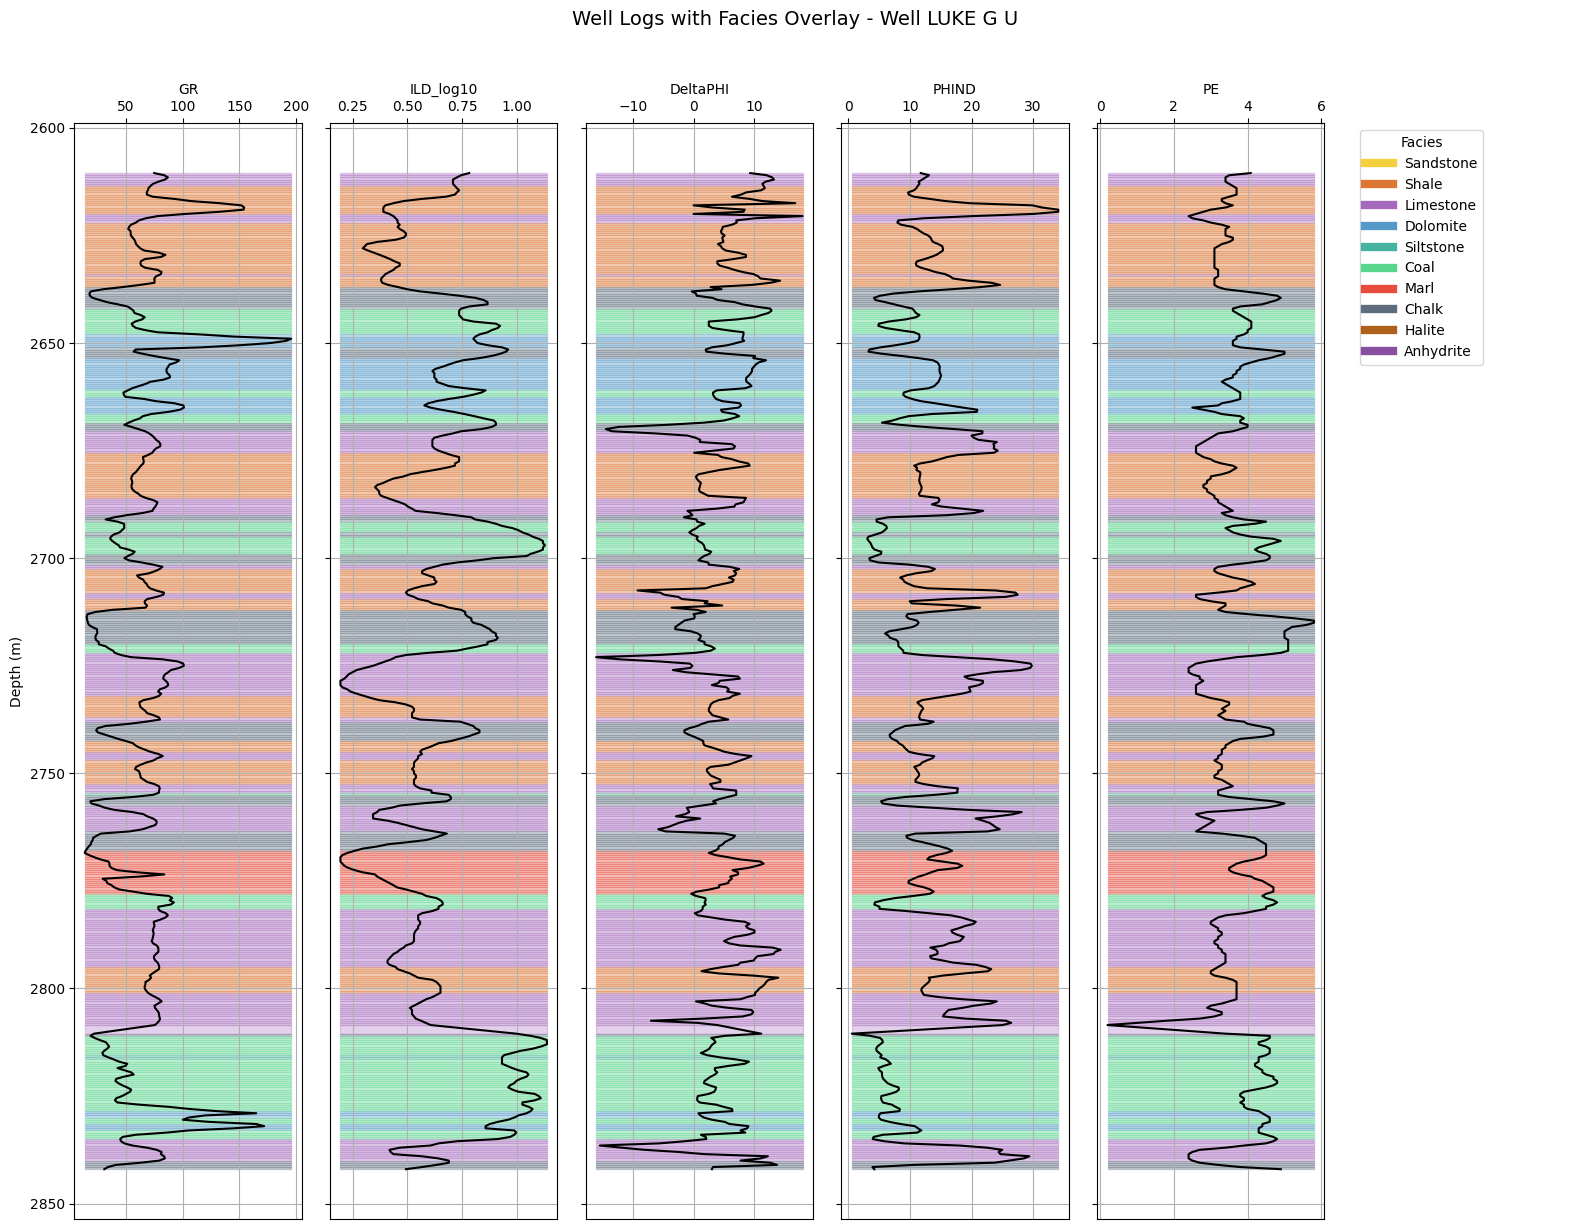

In [18]:

# Define facies colors and labels
facies_colors = [
    "#F4D03F", "#DC7633", "#A569BD", "#5499C7", "#45B39D",
    "#58D68D", "#E74C3C", "#5D6D7E", "#AF601A", "#884EA0"
]
facies_labels = {
    1: "Sandstone", 2: "Shale", 3: "Limestone", 4: "Dolomite",
    5: "Siltstone", 6: "Coal", 7: "Marl", 8: "Chalk", 9: "Halite", 10: "Anhydrite"
}

# Filter for LUKE GU well
well_name = 'LUKE G U'
well_data = training_data[training_data['Well Name'] == well_name].copy()

# Ensure Facies is integer-coded from 1
if well_data['Facies'].dtype != 'int':
    well_data['Facies'] = well_data['Facies'].astype('category').cat.codes + 1

depth = well_data['Depth'].values
facies = well_data['Facies'].values

log_cols = ["GR", "ILD_log10", "DeltaPHI","PHIND", "PE"]
n_logs = len(log_cols)

fig, axes = plt.subplots(1, n_logs + 1, figsize=(2.8 * n_logs + 2, 12), sharey=True)

for i, col in enumerate(log_cols):
    ax = axes[i]
    values = well_data[col].values
    val_min, val_max = values.min(), values.max()
    # Facies color bands
    for j in range(len(well_data) - 1):
        ax.fill_betweenx(
            [depth[j], depth[j + 1]],
            val_min, val_max,
            color=facies_colors[facies[j] - 1],
            alpha=0.3
        )
    ax.plot(values, depth, color='black', label=col)
    ax.set_xlabel(col)
    ax.invert_yaxis()
    ax.grid(True)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
axes[0].set_ylabel("Depth (m)")

# Facies legend in last axis
handles = [plt.Line2D([0], [0], color=color, lw=6, label=facies_labels[i+1]) for i, color in enumerate(facies_colors)]
axes[-1].legend(handles=handles, loc='upper left', fontsize=10, title="Facies")
axes[-1].axis('off')

fig.suptitle(f"Well Logs with Facies Overlay - Well {well_name}", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

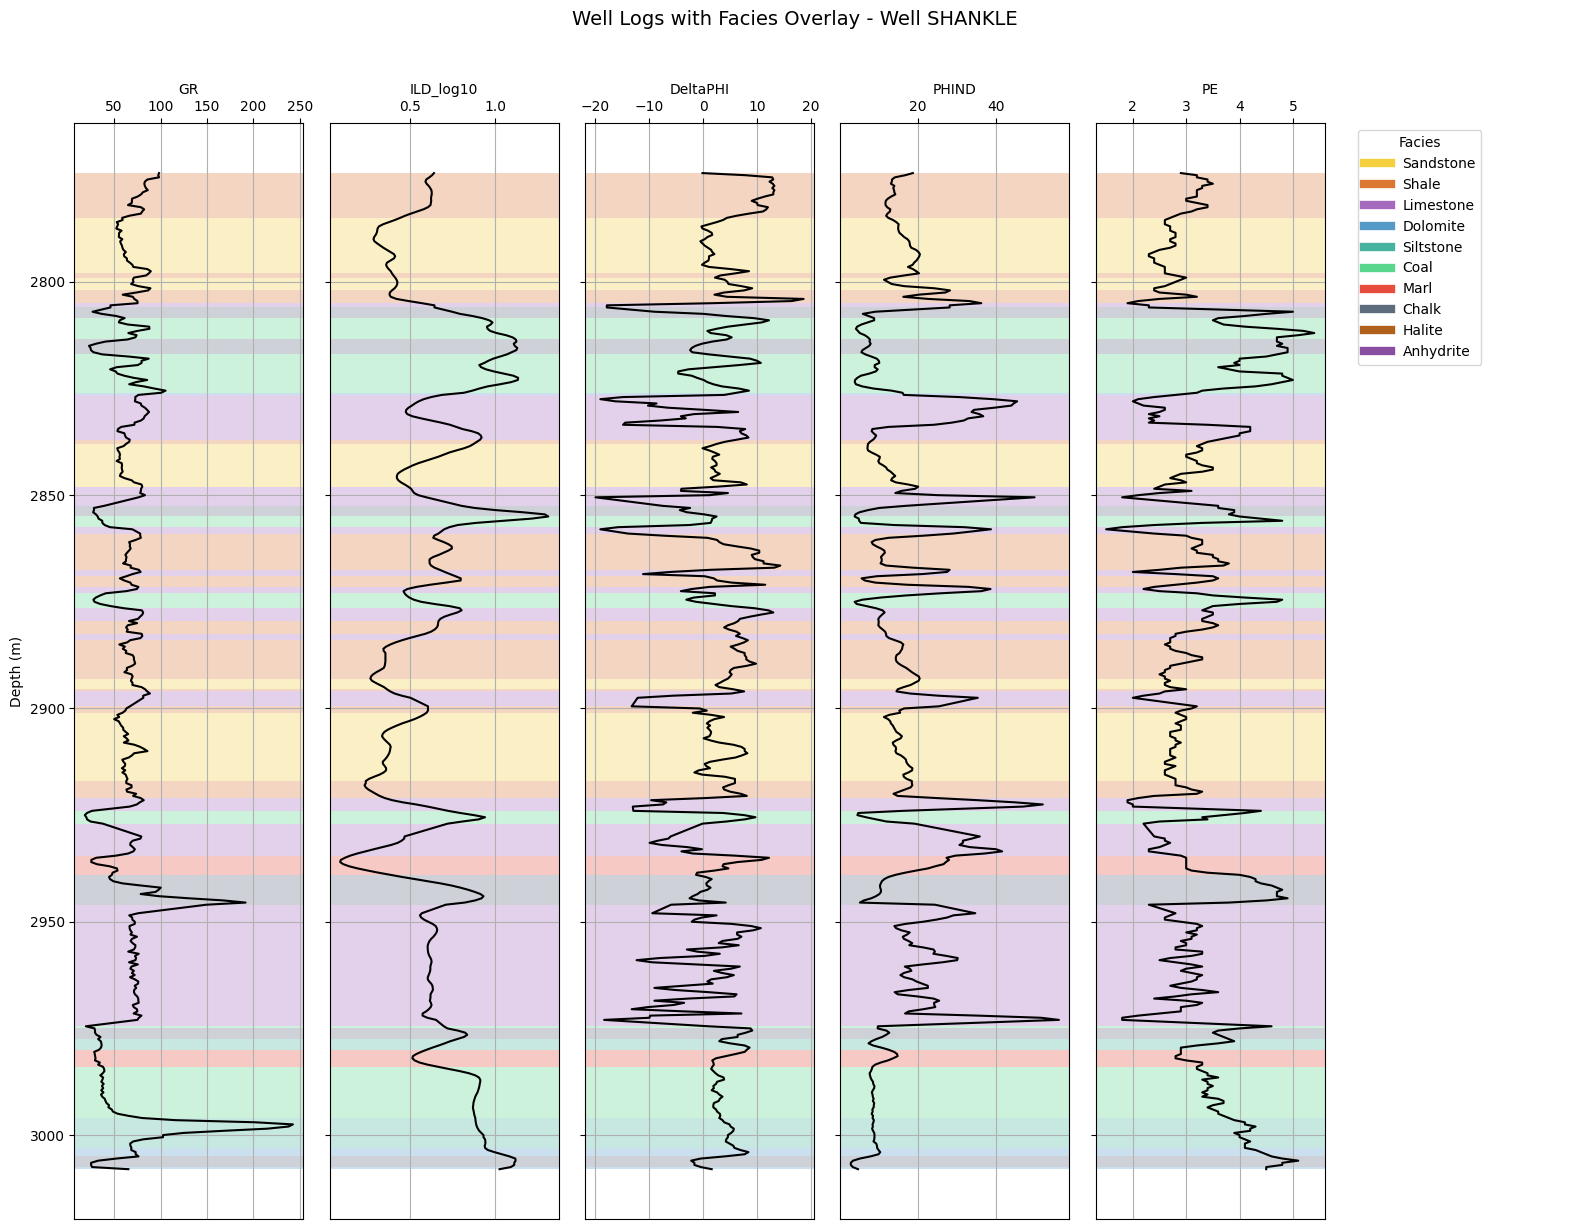

In [20]:
# Define facies colors and labels
facies_colors = [
    "#F4D03F", "#DC7633", "#A569BD", "#5499C7", "#45B39D",
    "#58D68D", "#E74C3C", "#5D6D7E", "#AF601A", "#884EA0"
]
facies_labels = {
    1: "Sandstone", 2: "Shale", 3: "Limestone", 4: "Dolomite",
    5: "Siltstone", 6: "Coal", 7: "Marl", 8: "Chalk", 9: "Halite", 10: "Anhydrite"
}

# Filter for SHANKLE well
well_name = 'SHANKLE'
well_data = training_data[training_data['Well Name'] == well_name].copy()

# Ensure Facies is integer-coded from 1
if well_data['Facies'].dtype != 'int':
    well_data['Facies'] = well_data['Facies'].astype('category').cat.codes + 1

depth = well_data['Depth'].values
facies = well_data['Facies'].values

log_cols = ["GR", "ILD_log10", "DeltaPHI","PHIND", "PE"]
n_logs = len(log_cols)

fig, axes = plt.subplots(1, n_logs + 1, figsize=(2.8 * n_logs + 2, 12), sharey=True)

for i, col in enumerate(log_cols):
    ax = axes[i]
    values = well_data[col].values
    val_min, val_max = values.min(), values.max()
    # Facies color bands (across the whole x-range)
    for j in range(len(well_data) - 1):
        ax.axhspan(
            depth[j], depth[j + 1],
            color=facies_colors[facies[j] - 1],
            alpha=0.3,
            linewidth=0
        )
    ax.plot(values, depth, color='black', label=col)
    ax.set_xlabel(col)
    ax.invert_yaxis()
    ax.grid(True)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
axes[0].set_ylabel("Depth (m)")

# Facies legend in last axis
handles = [plt.Line2D([0], [0], color=color, lw=6, label=facies_labels[i+1]) for i, color in enumerate(facies_colors)]
axes[-1].legend(handles=handles, loc='upper left', fontsize=10, title="Facies")
axes[-1].axis('off')

fig.suptitle(f"Well Logs with Facies Overlay - Well {well_name}", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

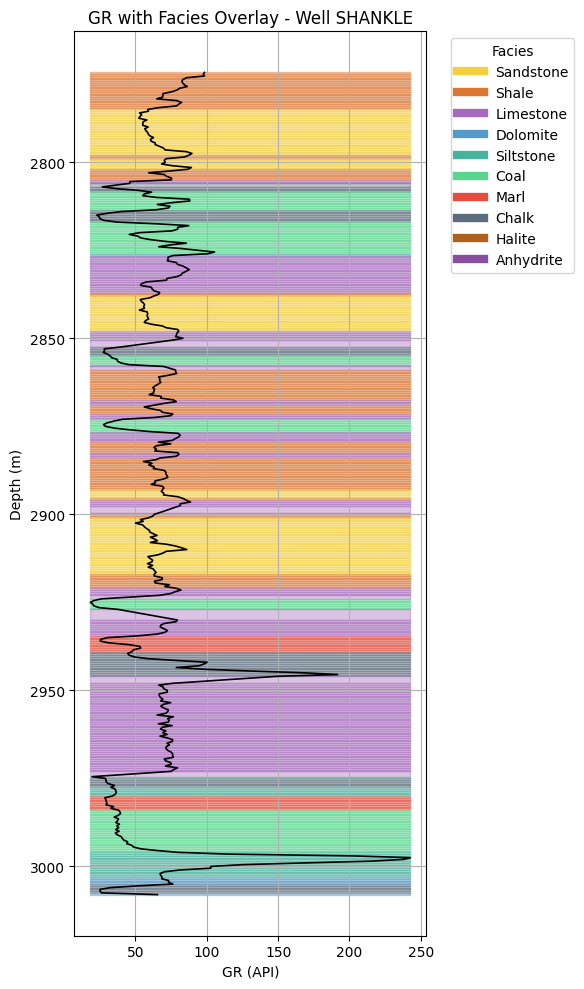

In [21]:

# Define facies colors and labels
facies_colors = [
    "#F4D03F", "#DC7633", "#A569BD", "#5499C7", "#45B39D",
    "#58D68D", "#E74C3C", "#5D6D7E", "#AF601A", "#884EA0"
]
facies_labels = {
    1: "Sandstone", 2: "Shale", 3: "Limestone", 4: "Dolomite",
    5: "Siltstone", 6: "Coal", 7: "Marl", 8: "Chalk", 9: "Halite", 10: "Anhydrite"
}

# Filter for SHANKLE well
well_name = 'SHANKLE'
well_data = training_data[training_data['Well Name'] == well_name].copy()

# Ensure Facies is integer-coded from 1
if well_data['Facies'].dtype != 'int':
    well_data['Facies'] = well_data['Facies'].astype('category').cat.codes + 1

depth = well_data['Depth'].values
gr = well_data['GR'].values
facies = well_data['Facies'].values

fig, ax = plt.subplots(figsize=(6, 10))

# Plot facies color bands
gr_min, gr_max = gr.min(), gr.max()
for i in range(len(well_data) - 1):
    ax.fill_betweenx(
        [depth[i], depth[i + 1]],
        gr_min, gr_max,
        color=facies_colors[facies[i] - 1],
        alpha=0.4
    )

# Plot GR curve
ax.plot(gr, depth, color='black', linewidth=1.2, label='GR (API)')
ax.set_xlabel("GR (API)")
ax.set_ylabel("Depth (m)")
ax.set_title(f"GR with Facies Overlay - Well {well_name}")
ax.invert_yaxis()
ax.grid(True)

# Facies legend
handles = [plt.Line2D([0], [0], color=color, lw=6, label=facies_labels[i+1]) for i, color in enumerate(facies_colors)]
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title="Facies")

plt.tight_layout()
plt.show()

# Predicting PE

## For this we have to calculate Pearson coefficient to see the weigtage of different cols 

In [22]:
training_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

In [23]:
col_for_pe = ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
corr = training_data[col_for_pe + ["PE"]].corr()

# Show correlation of each log with PE
print("Pearson correlation with PE:")
print(corr["PE"].drop("PE"))

Pearson correlation with PE:
                 PE        PE
Facies     0.709634  0.709634
Depth      0.313094  0.313094
GR        -0.270235 -0.270235
ILD_log10  0.451489  0.451489
DeltaPHI   0.011094  0.011094
PHIND     -0.588741 -0.588741
NM_M       0.677349  0.677349
RELPOS     0.016002  0.016002


<Figure size 600x400 with 0 Axes>

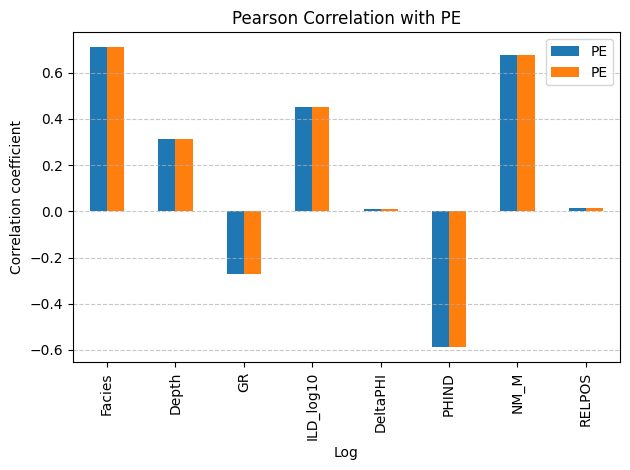

In [24]:
# Plot correlation as bar plot
plt.figure(figsize=(6, 4))
corr["PE"].drop("PE").plot(kind='bar')
plt.title("Pearson Correlation with PE")
plt.ylabel("Correlation coefficient")
plt.xlabel("Log")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Select features and target
features = ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS']
target = "PE"

# 2. Drop rows with missing values in features or target
data = training_data.dropna(subset=features + [target])

X = data[features]
y = data[target]

# 3. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)
print("R2 score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# 6. (Optional) Predict PE for all data (including missing PE)
training_data['PE_pred'] = model.predict(training_data[features].fillna(training_data[features].mean()))

R2 score: 0.8478692547400803
RMSE: 0.34004534073432563


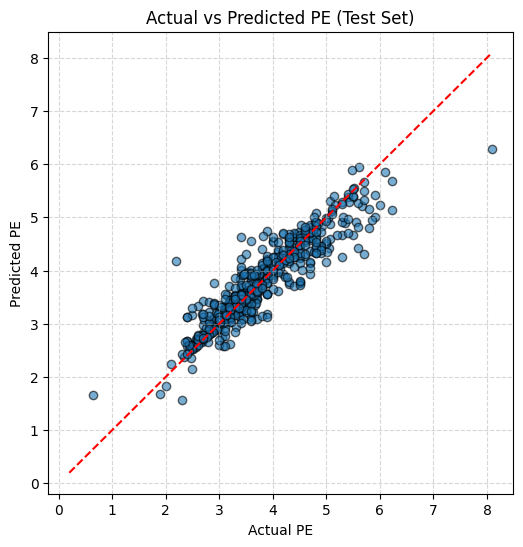

In [27]:

# --- Predict for all data ---
training_data['PE_pred'] = model.predict(
    training_data[features].fillna(training_data[features].mean())
)

# --- 1. Scatter Plot: Actual vs Predicted on Test Set ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")
plt.title("Actual vs Predicted PE (Test Set)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


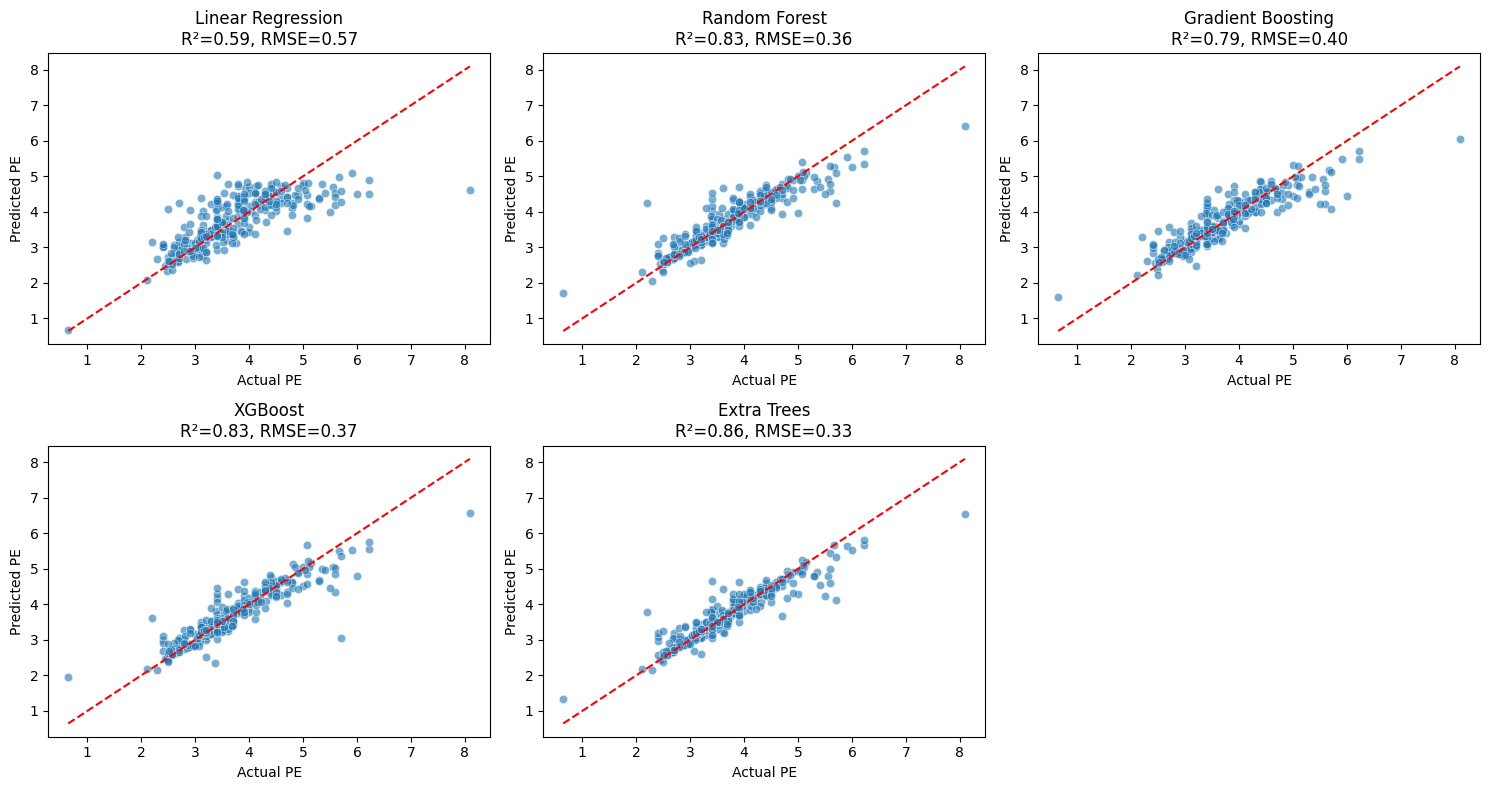

               Model  Train R²    Val R²   Test R²  Test RMSE
0  Linear Regression  0.641852  0.693768  0.590201   0.566282
1      Random Forest  0.977803  0.830602  0.831645   0.362962
2  Gradient Boosting  0.880565  0.777717  0.794898   0.400620
3            XGBoost  0.966346  0.839295  0.829709   0.365043
4        Extra Trees  1.000000  0.840650  0.864021   0.326199


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# ===== Step 1: Prepare data =====
features = ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS']
# ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS','PHID', 'PHIN','NPHI',]

target = "PE"

data = training_data.dropna(subset=features + [target])
X = data[features]
y = data[target]

# ===== Step 2: Train/Val/Test split =====
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)

# ===== Step 3: Define models =====
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, verbosity=0),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

results = []

# ===== Step 4: Prepare subplots =====
n_models = len(models)
fig, axes = plt.subplots(2, (n_models + 1) // 2, figsize=(15, 8))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results.append((name, train_r2, val_r2, test_r2, test_rmse))
    
    # ===== Plot in subplot =====
    ax = axes[idx]
    sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f"{name}\nR²={test_r2:.2f}, RMSE={test_rmse:.2f}")
    ax.set_xlabel("Actual PE")
    ax.set_ylabel("Predicted PE")
    
# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ===== Step 5: Show summary table =====
results_df = pd.DataFrame(results, columns=["Model", "Train R²", "Val R²", "Test R²", "Test RMSE"])
print(results_df)


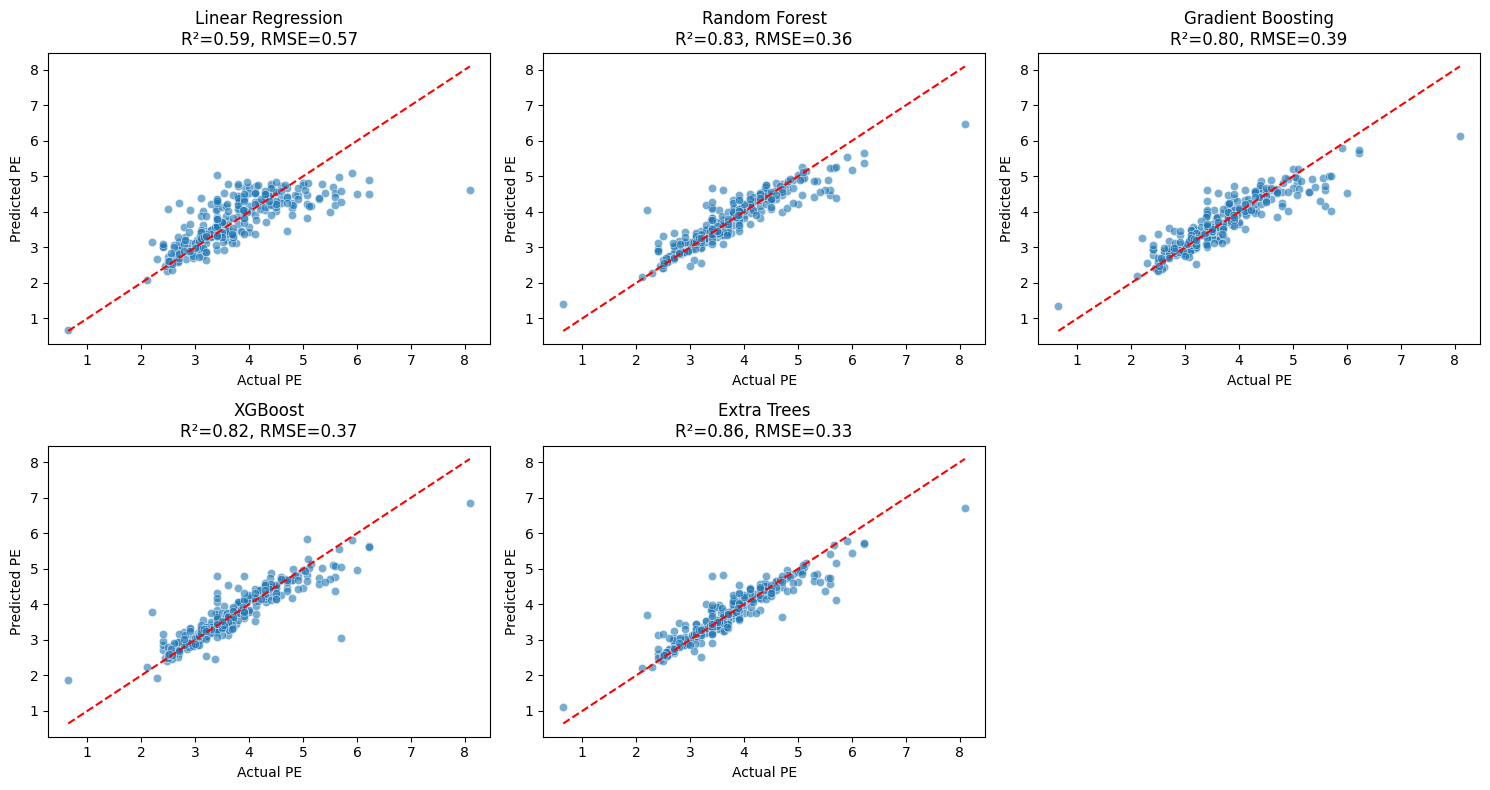

               Model  Train R²    Val R²   Test R²  Test RMSE
0  Linear Regression  0.641852  0.693768  0.590201   0.566282
1      Random Forest  0.977966  0.823640  0.833300   0.361174
2  Gradient Boosting  0.883075  0.786766  0.803950   0.391679
3            XGBoost  0.967694  0.821024  0.824188   0.370913
4        Extra Trees  1.000000  0.843737  0.860132   0.330831


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# ===== Step 1: Prepare data =====
#features = ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS']
features= ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS','PHID', 'PHIN','NPHI']

target = "PE"

data = training_data.dropna(subset=features + [target])
X = data[features]
y = data[target]

# ===== Step 2: Train/Val/Test split =====
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)

# ===== Step 3: Define models =====
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, verbosity=0),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

results = []

# ===== Step 4: Prepare subplots =====
n_models = len(models)
fig, axes = plt.subplots(2, (n_models + 1) // 2, figsize=(15, 8))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results.append((name, train_r2, val_r2, test_r2, test_rmse))
    
    # ===== Plot in subplot =====
    ax = axes[idx]
    sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f"{name}\nR²={test_r2:.2f}, RMSE={test_rmse:.2f}")
    ax.set_xlabel("Actual PE")
    ax.set_ylabel("Predicted PE")
    
# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ===== Step 5: Show summary table =====
results_df = pd.DataFrame(results, columns=["Model", "Train R²", "Val R²", "Test R²", "Test RMSE"])
print(results_df)


In [57]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
search = RandomizedSearchCV(RandomForestRegressor(), param_grid, n_iter=20, scoring='r2', cv=3)
search.fit(X_train, y_train)
print(search.best_params_)


{'n_estimators': 500, 'min_samples_split': 2, 'max_depth': None}


# Check pearson coefficient on extracted feature

In [58]:
training_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'PE_pred', 'PHID', 'PHIN',
       'NPHI'],
      dtype='object')

In [74]:
col_for_pe = ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS','PHID', 'PHIN','NPHI','VSH', 'Bulk Density']
corr = training_data[col_for_pe + ["PE"]].corr()

# Show correlation of each log with PE
print("Pearson correlation with PE:")
print(corr["PE"].drop("PE"))

Pearson correlation with PE:
                    PE        PE
Facies        0.709634  0.709634
Depth         0.313094  0.313094
GR           -0.270235 -0.270235
ILD_log10     0.451489  0.451489
DeltaPHI      0.011094  0.011094
...                ...       ...
PHID         -0.516874 -0.516874
PHIN         -0.596181 -0.596181
NPHI         -0.596181 -0.596181
VSH          -0.270235 -0.270235
Bulk Density  0.588741  0.588741

[13 rows x 2 columns]


<Figure size 600x400 with 0 Axes>

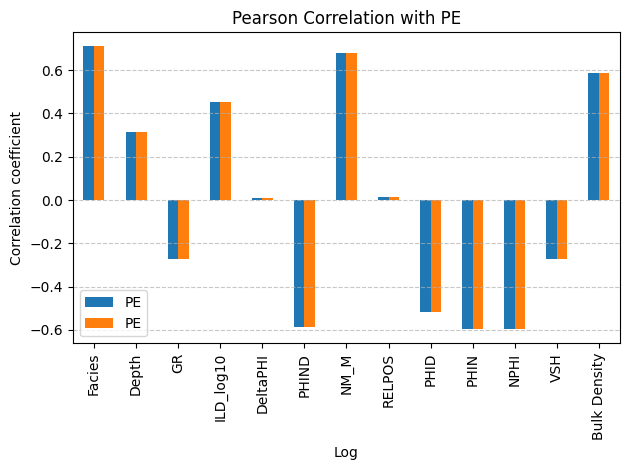

In [75]:
# Plot correlation as bar plot
plt.figure(figsize=(6, 4))
corr["PE"].drop("PE").plot(kind='bar')
plt.title("Pearson Correlation with PE")
plt.ylabel("Correlation coefficient")
plt.xlabel("Log")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

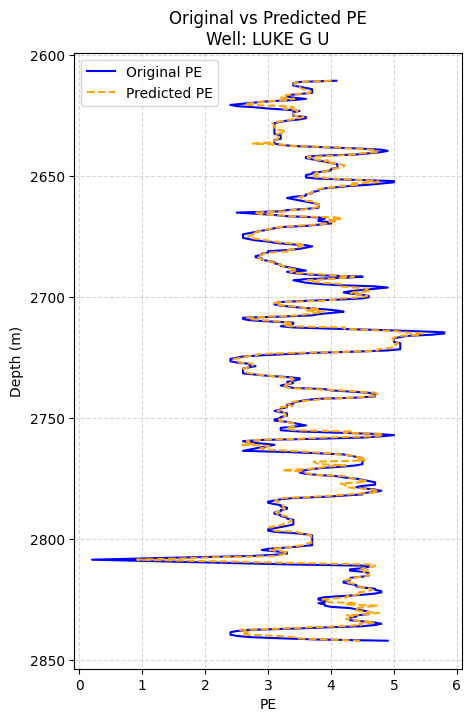

In [76]:

# --- 2. Depth Plot for a single well ---
well_name = "LUKE G U"  # change as needed
well_data = training_data[training_data['Well Name'] == well_name].sort_values("Depth")

plt.figure(figsize=(5, 8))
plt.plot(well_data['PE'], well_data['Depth'], label='Original PE', color='blue')
plt.plot(well_data['PE_pred'], well_data['Depth'], label='Predicted PE', color='orange', linestyle='--')
plt.gca().invert_yaxis()
plt.xlabel("PE")
plt.ylabel("Depth (m)")
plt.title(f"Original vs Predicted PE\nWell: {well_name}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [77]:
# Show a table of actual vs predicted PE
pe_comparison = training_data[['Well Name', 'Depth', 'PE', 'PE_pred']].copy()

# Optional: show only rows where PE is not missing (so we can compare)
pe_comparison_nonnull = pe_comparison.dropna(subset=['PE'])

# Display first 20 comparisons
print(pe_comparison_nonnull.head(100))


    Well Name   Depth   PE  PE_pred
0   SHRIMPLIN  2793.0  4.6  4.27897
1   SHRIMPLIN  2793.5  4.1  3.92401
2   SHRIMPLIN  2794.0  3.6  3.59901
3   SHRIMPLIN  2794.5  3.5  3.51027
4   SHRIMPLIN  2795.0  3.4  3.46400
..        ...     ...  ...      ...
95  SHRIMPLIN  2840.5  3.3  3.09605
96  SHRIMPLIN  2841.0  2.8  3.02122
97  SHRIMPLIN  2841.5  2.7  2.93628
98  SHRIMPLIN  2842.0  2.9  3.01450
99  SHRIMPLIN  2842.5  3.5  3.58662

[100 rows x 4 columns]


# Feature Engineering

PHID (Density Porosity), derived using PHIND and DeltaPHI from the dataset:  

$$
\Phi_D = \frac{1}{2} \left( 2\Phi_{ND} - \Delta \Phi \right)
$$

NPHI (Neutron Porosity), derived using PHIND and DeltaPHI:  

$$
\Phi_N = \frac{1}{2} \left( 2\Phi_{ND} + \Delta \Phi \right)
$$

Volume of shale:  

$$
V_{sh} = \frac{GR - GR_{sand}}{GR_{shale} - GR_{sand}}
$$

Bulk density:  

$$
\rho_g = \left( 1 - \frac{\phi_{ND}}{100} \right) \cdot \rho_{matrix} + \left( \frac{\phi_{ND}}{100} \right) \cdot \rho_{fluid}
$$


In [31]:
training_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'PE_pred'],
      dtype='object')

In [67]:
phid=0.5*( 2*training_data['PHIND']-training_data['DeltaPHI'] )
training_data['PHID'] = phid

# NPHI
phin= (0.5)*(2*training_data['PHIND'] + training_data['DeltaPHI'])
training_data['NPHI'] = phin

# Volume of shale
vsh = (training_data['GR'] - training_data['GR'].min()) / (training_data['GR'].max() - training_data['GR'].min())
training_data['VSH'] = vsh

# Bulk density
rho_matrix = 2.65  # g/cm^3 for sandstone
rho_fluid = 1.0  # g/cm^3 for water
# Calculate bulk density using PHIND
bd = (1-(training_data['PHIND'])/100) *rho_matrix+((training_data["PHIND"])/100) *rho_fluid
training_data['Bulk Density'] = bd

training_data[['PHID', 'NPHI',"VSH","Bulk Density"]].describe()


PHID         NPHI          VSH  Bulk Density
count  3745.000000  3745.000000  3745.000000   3745.000000
mean     10.759118    15.468241     0.156466      2.433624
std       7.571067     6.736026     0.085353      0.109749
min      -5.000000     2.090000     0.000000      1.257400
25%       6.255000    10.400000     0.102319      2.386000
50%       8.900000    15.100000     0.157210      2.449459
75%      13.025000    19.464000     0.198834      2.508100
max      83.500000    85.400000     1.000000      2.640925

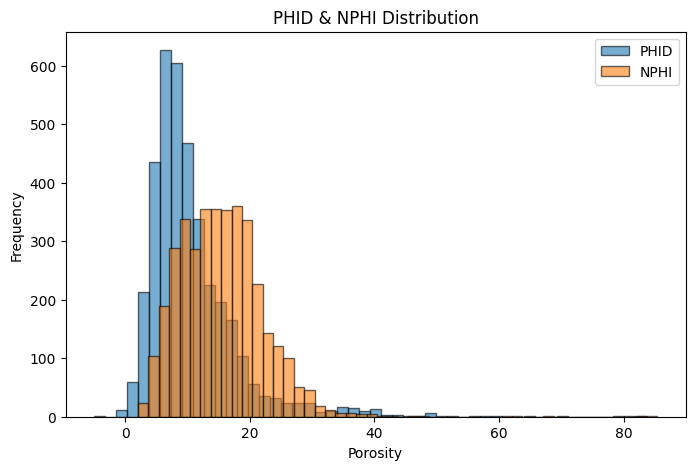

In [69]:
# Plot both on the same histogram
plt.figure(figsize=(8, 5))
plt.hist(training_data['PHID'], bins=50, edgecolor='black', alpha=0.6, label='PHID')
plt.hist(training_data['NPHI'], bins=50, edgecolor='black', alpha=0.6, label='NPHI')

plt.title("PHID & NPHI Distribution")
plt.xlabel("Porosity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


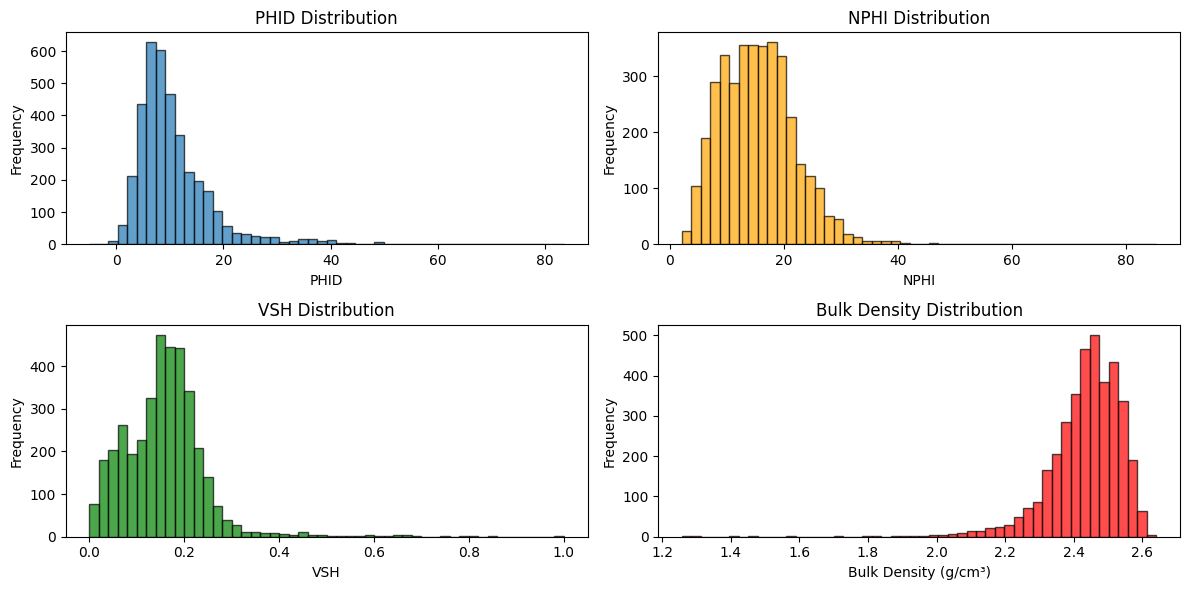

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

# PHID histogram
axes[0].hist(training_data['PHID'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title("PHID Distribution")
axes[0].set_xlabel("PHID")
axes[0].set_ylabel("Frequency")

# NPHI histogram
axes[1].hist(training_data['NPHI'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title("NPHI Distribution")
axes[1].set_xlabel("NPHI")
axes[1].set_ylabel("Frequency")

# VSH histogram
axes[2].hist(training_data['VSH'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[2].set_title("VSH Distribution")
axes[2].set_xlabel("VSH")
axes[2].set_ylabel("Frequency") 

# Bulk Density histogram
axes[3].hist(training_data['Bulk Density'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[3].set_title("Bulk Density Distribution")
axes[3].set_xlabel("Bulk Density (g/cm³)")
axes[3].set_ylabel("Frequency") 

plt.tight_layout()
plt.show()


In [73]:
training_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'PE_pred', 'PHID', 'PHIN',
       'NPHI', 'VSH', 'Bulk Density'],
      dtype='object')

# Data preparation  splitting, training, model selection, and tuning

Supervised Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.79      0.84        52
           2       0.66      0.78      0.71       125
           3       0.68      0.66      0.67       110
           4       0.68      0.50      0.58        42
           5       0.65      0.48      0.55        42
           6       0.70      0.67      0.68        72
           7       0.53      0.57      0.55        14
           8       0.60      0.67      0.63        83
           9       0.80      0.77      0.78        26

    accuracy                           0.68       566
   macro avg       0.69      0.65      0.67       566
weighted avg       0.68      0.68      0.68       566



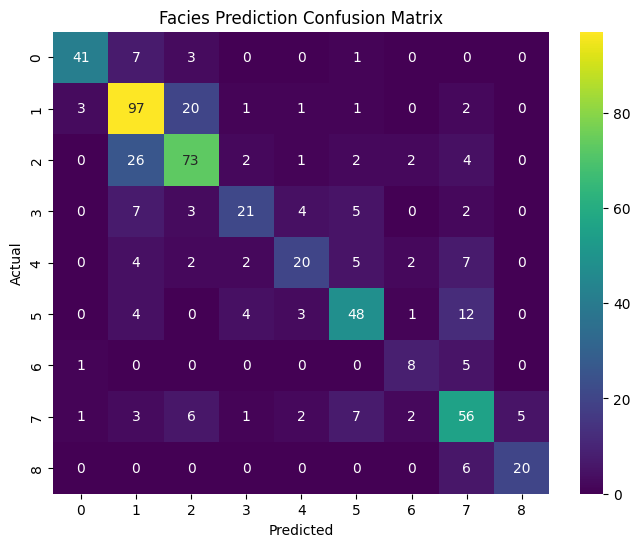

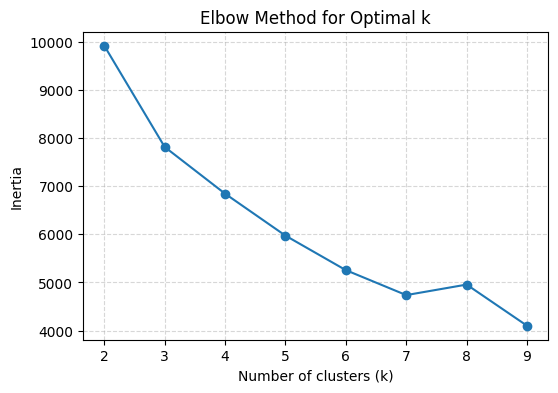

/tmp/ipykernel_23587/1448919822.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs_clean['Electrofacies'] = kmeans.fit_predict(X_scaled) + 1  # +1 for labeling starting from 1


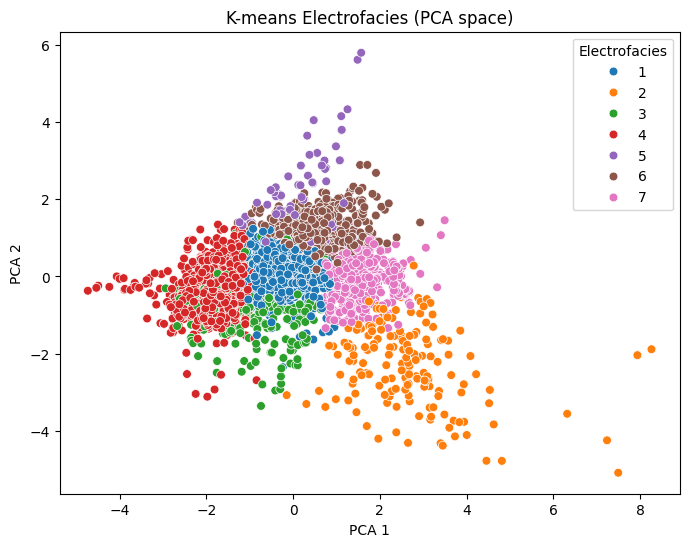

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Prepare data
# ---------------------------
logs = training_data.copy()

# Select logs for classification
input_logs = ['GR', 'ILD_log10', 'PHIND', 'DeltaPHI', 'PE']  # Resistivity (ILD_log10), density (PHIND), porosity (DeltaPHI), PE

# Drop missing values for these logs
logs_clean = logs.dropna(subset=input_logs + ['Facies'])

# Scale logs for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(logs_clean[input_logs])

# ---------------------------
# 2. Supervised Classification (Random Forest)
# ---------------------------
X = logs_clean[input_logs]
y = logs_clean['Facies']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

print("Supervised Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Facies Prediction Confusion Matrix")
plt.show()

# ---------------------------
# 3. Unsupervised Classification (K-means)
# ---------------------------
# Optional: PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Let's assume optimal k found is  7(example)
k_optimal =7
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
logs_clean['Electrofacies'] = kmeans.fit_predict(X_scaled) + 1  # +1 for labeling starting from 1

# ---------------------------
# 4. Plot electrofacies in PCA space
# ---------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=logs_clean['Electrofacies'], palette='tab10', s=40)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-means Electrofacies (PCA space)")
plt.legend(title="Electrofacies")
plt.show()


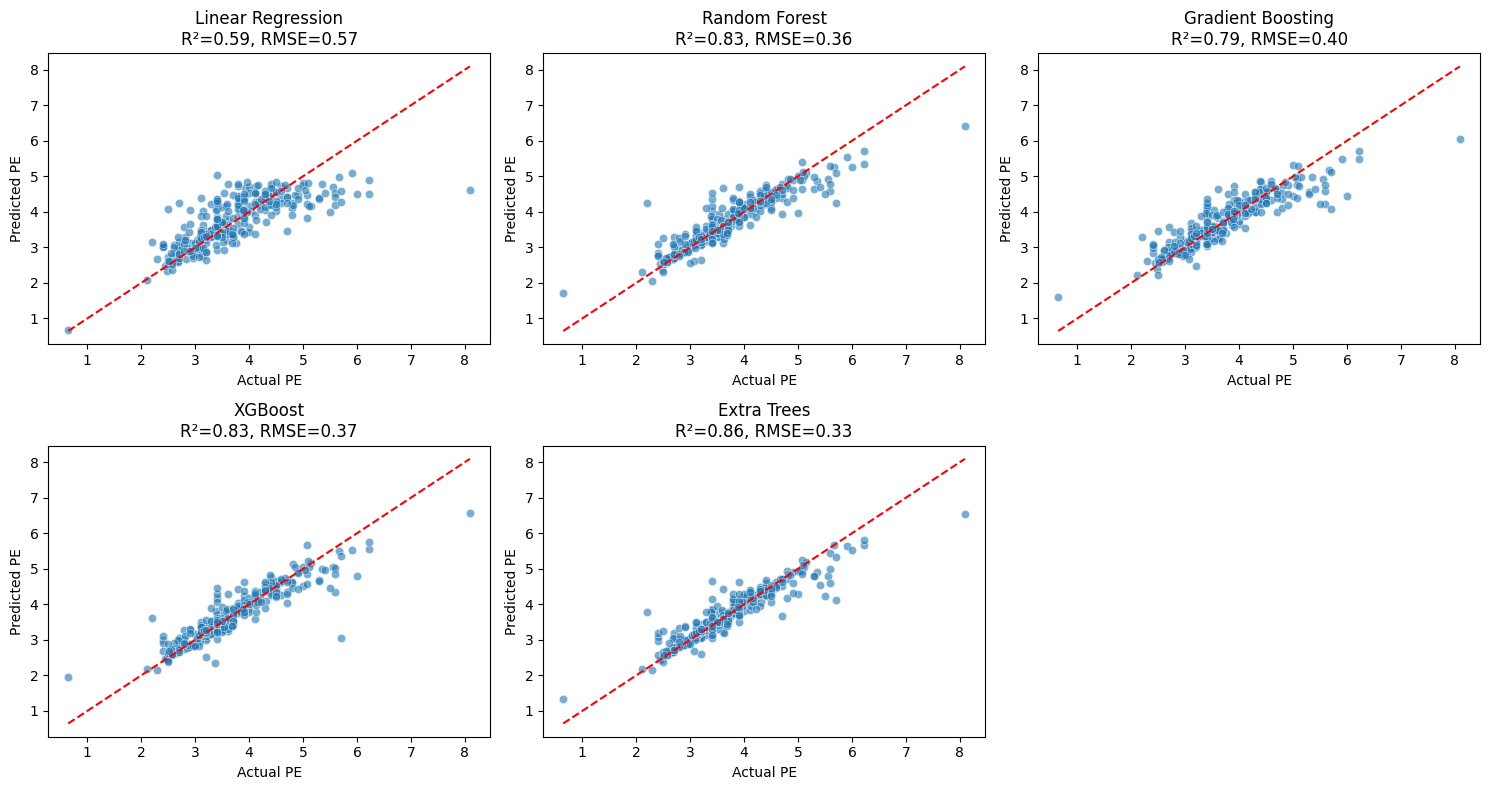

               Model  Train R²    Val R²   Test R²  Test RMSE
0  Linear Regression  0.641852  0.693768  0.590201   0.566282
1      Random Forest  0.977803  0.830602  0.831645   0.362962
2  Gradient Boosting  0.880565  0.777717  0.794898   0.400620
3            XGBoost  0.966346  0.839295  0.829709   0.365043
4        Extra Trees  1.000000  0.840650  0.864021   0.326199


In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# ===== Step 1: Prepare data =====
features = ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS']
target = "PE"

data = training_data.dropna(subset=features + [target])
X = data[features]
y = data[target]

# ===== Step 2: Train/Val/Test split =====
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)

# ===== Step 3: Define models =====
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, verbosity=0),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

results = []

# ===== Step 4: Prepare subplots =====
n_models = len(models)
fig, axes = plt.subplots(2, (n_models + 1) // 2, figsize=(15, 8))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results.append((name, train_r2, val_r2, test_r2, test_rmse))
    
    # ===== Plot in subplot =====
    ax = axes[idx]
    sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f"{name}\nR²={test_r2:.2f}, RMSE={test_rmse:.2f}")
    ax.set_xlabel("Actual PE")
    ax.set_ylabel("Predicted PE")
    
# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ===== Step 5: Show summary table =====
results_df = pd.DataFrame(results, columns=["Model", "Train R²", "Val R²", "Test R²", "Test RMSE"])
print(results_df)


In [52]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 4.0 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 5.5 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [49]:
# ===== Step 1: Load and Filter =====
# Assuming `training_data` is already loaded
high_pe = training_data[training_data['PE'] > 5.5]
remaining = training_data[training_data['PE'] <= 5.5]

# ===== Step 2: Split each subset =====
def split_data(df, target_col, test_size=0.1, val_size=0.1):
    train_df, temp_df = train_test_split(df, test_size=(test_size + val_size), random_state=42, stratify=df[target_col])
    val_df, test_df = train_test_split(temp_df, test_size=(test_size / (test_size + val_size)), random_state=42, stratify=temp_df[target_col])
    return train_df, val_df, test_df

target = "Facies"  # Assuming facies is the classification target
train_high, val_high, test_high = split_data(high_pe, target)
train_rem, val_rem, test_rem = split_data(remaining, target)

# ===== Step 3: Merge training sets =====
train_total = pd.concat([train_high, train_rem])
val_total = pd.concat([val_high, val_rem])
test_total = pd.concat([test_high, test_rem])

X_train, y_train = train_total.drop(columns=[target]), train_total[target]
X_val, y_val = val_total.drop(columns=[target]), val_total[target]
X_test, y_test = test_total.drop(columns=[target]), test_total[target]

# ===== Step 4: Try multiple models =====
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    results.append((name, train_score, val_score))

# ===== Step 5: Filter models based on criteria =====
filtered = [(name, tr, val) for name, tr, val in results if 0.8 < tr < 0.9]
best_model_name, best_train, best_val = min(filtered, key=lambda x: abs(x[1] - x[2]))
print(f"Selected model: {best_model_name} | Train: {best_train:.3f}, Val: {best_val:.3f}")

# ===== Step 6: Hyperparameter tuning =====
if best_model_name == "RandomForest":
    param_grid = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
    base_model = RandomForestClassifier(random_state=42)
elif best_model_name == "GradientBoosting":
    param_grid = {"n_estimators": [50, 100, 200], "learning_rate": [0.05, 0.1, 0.2]}
    base_model = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(base_model, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)
print("Final Test Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))

# ===== Step 7: Plot histograms =====
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(train_total[target], ax=axes[0, 0], bins=20, color="gray")
axes[0, 0].set_title("Target y - Total")

sns.histplot(y_train, ax=axes[0, 1], bins=20, color="skyblue")
axes[0, 1].set_title("Target y - Train")

sns.histplot(y_val, ax=axes[1, 0], bins=20, color="lightgreen")
axes[1, 0].set_title("Target y - Validation")

sns.histplot(y_test, ax=axes[1, 1], bins=20, color="salmon")
axes[1, 1].set_title("Target y - Test")

plt.tight_layout()
plt.show()


ValueError: could not convert string to float: 'A1 LM'